<a href="https://colab.research.google.com/github/Witcape/PSO/blob/main/Different_Initialisation_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installing LLM

In [1]:
# !pip install accelerate
# import accelerate

In [2]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.4 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
    Using cached setuptools-70.1.1-py3-none-any.whl (883 kB)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 1.3 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 15.3 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 11.1 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 3.8 MB/s eta 0:00:00
    Using cached wheel-0.43.0-py3-none-any.whl (65 kB)
    Creating /tmp/pip-build-env-19_5sou9/overlay/local/bin
    changing mode of /tmp/pip-build-env-19_5sou9/overlay/local/bin/ninja to 755
    changing mode of /tmp/pip-build-env-19_5sou9/overlay/local/bin/wheel to 755
    changing mode of /tmp/pip

In [3]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [4]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt

In [5]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [6]:
# GPU
lcpp_llm = None
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [7]:
lcpp_llm.params.n_gpu_layers

32

### Different Initialisation Methods over PSO

## CASE 1: Chaotic Number Generator

In [8]:
method ='Chaotic Number Generator'
prompt = f"generate Exactly 20 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [9]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

In [10]:
print(response)

{'id': 'cmpl-3b9cdb83-6ce0-426c-93d7-045a4687f412', 'object': 'text_completion', 'created': 1719675080, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': 'SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\nUSER: generate Exactly 20 numbers between -10 to 10 by using Chaotic Number Generator, only 2 decimal places, \n\nASSISTANT:\n\nHere are exactly 20 chaotic numbers between -10 and 10 with two decimal places:\n\n-8.45\n-7.93\n-6.21\n-5.49\n-4.77\n-3.95\n-3.23\n-2.51\n-1.79\n-1.07\n 0.43\n 0.85\n 1.27\n 1.69\n 2.11\n 2.53\n 3.07\n 3.61\n 4.15\n\nPlease note that chaotic number generators can produce non-repeating and non-predictable numbers, but they may not always be entirely random. If you need truly random numbers, I suggest using a cryptographically secure pseudo-random number generator (CSPRNG) or other tru

In [11]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Chaotic_Initialisation = numbers
print(Chaotic_Initialisation)

[-8.45, -7.93, -6.21, -5.49, -4.77, -3.95, -3.23, -2.51, -1.79, -1.07, 0.43, 0.85, 1.27, 1.69, 2.11, 2.53, 3.07, 3.61, 4.15]


### PSO Parameters

In [12]:
!pip install pyswarms
import numpy as np
import pyswarms as ps
# from pso.cost_functions import sphere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.4 MB/s eta 0:00:00


In [13]:
# initial_position = np.array(numbers)

# def objective_function(x):
#     return np.sum(x**2)

# bounds = (np.array([-10]), np.array([10]))

# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# optimizer = ps.single.GlobalBestPSO(n_particles=len(numbers), dimensions=1, options=options, bounds=bounds, init_pos=initial_position.reshape(-1, 1))

# best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# print('Best position:', best_pos)
# print('Best objective:', best_cost)


In [14]:
def sphere(x):
    return sum(x**2)

In [15]:
CostFunction = sphere  #
nVar = 10  # Number of Decision Variables
VarSize = (nVar,)  # Size of Decision Variables Matrix
VarMin = -10  # Lower Bound of Variables
VarMax = 10  # Upper Bound of Variables

In [16]:
MaxIt = 20  # Maximum Number of Iterations
nPop = np.size(numbers)  # Population Size (Swarm Size)
if(nPop > 20):
  numbers = numbers[:19]
print(nPop)

19


In [17]:
w = 1  # Inertia Weight
wdamp = 0.99  # Inertia Weight Damping Ratio
c1 = 1.5  # Personal Learning Coefficient
c2 = 2.0  # Global Learning Coefficient

In [18]:
# Velocity Limits                        HOWW. ASK BHAIYA ABOUT THIS
VelMax = 0.1 * (VarMax - VarMin)
VelMin = -VelMax

In [19]:
particles = []

for _ in range(nPop):
    position = np.random.uniform(VarMin, VarMax, VarSize)
    velocity = np.zeros(VarSize)
    cost = CostFunction(position)
    best_position = position.copy()
    best_cost = cost
    particles.append({
        'Position': position,
        'Velocity': velocity,
        'Cost': cost,
        'Best': {
            'Position': best_position,
            'Cost': best_cost
        }
    })

print(np.size(particles))

19


In [20]:
GlobalBest = {'Position': None, 'Cost': np.inf}

for p in particles:
    if p['Cost'] < GlobalBest['Cost']:
        GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

BestCost = np.zeros(MaxIt)

### Running PSO

In [21]:
g_values = []
w_values = []
for it in range(MaxIt):
    for p in particles:
        # Update Velocity
        r1 = np.random.rand(*VarSize)
        r2 = np.random.rand(*VarSize)
        p['Velocity'] = (
            w * p['Velocity']
            + c1 * r1 * (p['Best']['Position'] - p['Position'])
            + c2 * r2 * (GlobalBest['Position'] - p['Position'])
        )

        # Apply Velocity Limits
        p['Velocity'] = np.maximum(p['Velocity'], VelMin)
        p['Velocity'] = np.minimum(p['Velocity'], VelMax)

        # Update Position
        p['Position'] += p['Velocity']

        # Velocity Mirror Effect
        IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
        p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

        # Apply Position Limits
        p['Position'] = np.maximum(p['Position'], VarMin)
        p['Position'] = np.minimum(p['Position'], VarMax)

        # Evaluation
        p['Cost'] = CostFunction(p['Position'])

        # Update Personal Best
        if p['Cost'] < p['Best']['Cost']:
            p['Best']['Position'] = p['Position'].copy()
            p['Best']['Cost'] = p['Cost']

            # Update Global Best
            if p['Best']['Cost'] < GlobalBest['Cost']:
                GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    BestCost[it] = GlobalBest['Cost']

    print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")
    g_values.append(GlobalBest['Cost'])

    w *= wdamp
    w_values.append(w)

w_values.append(w)
G_values_PSO_with_Chaotic_Initialisation = g_values

Iteration 1: Best Cost = 95.81318302418991
Iteration 2: Best Cost = 63.60053873904889
Iteration 3: Best Cost = 28.601818771602066
Iteration 4: Best Cost = 11.568002310425129
Iteration 5: Best Cost = 11.568002310425129
Iteration 6: Best Cost = 11.568002310425129
Iteration 7: Best Cost = 7.9359559823818575
Iteration 8: Best Cost = 7.742273568449956
Iteration 9: Best Cost = 4.722742686548912
Iteration 10: Best Cost = 4.063721904435923
Iteration 11: Best Cost = 4.063721904435923
Iteration 12: Best Cost = 2.7455323239994325
Iteration 13: Best Cost = 2.7455323239994325
Iteration 14: Best Cost = 2.7455323239994325
Iteration 15: Best Cost = 2.7455323239994325
Iteration 16: Best Cost = 2.7455323239994325
Iteration 17: Best Cost = 2.164817157940039
Iteration 18: Best Cost = 2.164817157940039
Iteration 19: Best Cost = 2.164817157940039
Iteration 20: Best Cost = 2.164817157940039


[95.81318302418991, 63.60053873904889, 28.601818771602066, 11.568002310425129, 11.568002310425129, 11.568002310425129, 7.9359559823818575, 7.742273568449956, 4.722742686548912, 4.063721904435923, 4.063721904435923, 2.7455323239994325, 2.7455323239994325, 2.7455323239994325, 2.7455323239994325, 2.7455323239994325, 2.164817157940039, 2.164817157940039, 2.164817157940039, 2.164817157940039]


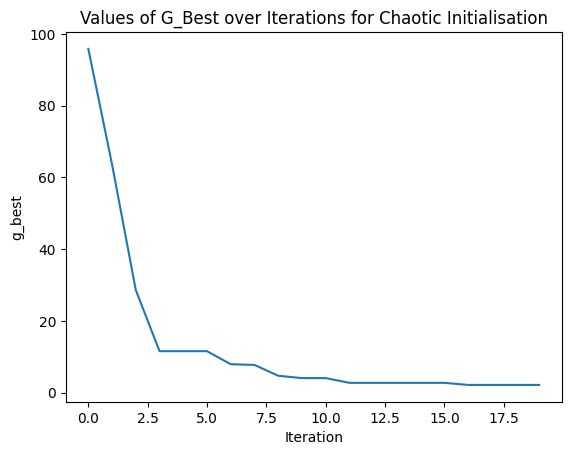

In [22]:
print(G_values_PSO_with_Chaotic_Initialisation)

plt.plot(G_values_PSO_with_Chaotic_Initialisation)
plt.xlabel("Iteration")
plt.ylabel("g_best")
plt.title("Values of G_Best over Iterations for Chaotic Initialisation")
plt.show()

## CASE 2: Pseudo-Random Number Generator

In [23]:
method ='Pseudo-Random Number Generator'
prompt = f"generate 20 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [24]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

Llama.generate: prefix-match hit


In [25]:
print(response)

{'id': 'cmpl-6986ece1-e7f6-4e5f-a1b1-d56303ac00dd', 'object': 'text_completion', 'created': 1719675181, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\nUSER: generate 20 numbers between -10 to 10 by using Pseudo-Random Number Generator, only 2 decimal places, \n\nASSISTANT:\n\nHere are 20 pseudo-random numbers between -10 and 10 with two decimal places:\n\n1. -8.47\n2. -5.93\n3. -3.62\n4. -2.21\n5. -1.07\n6. -0.34\n7. 0.34\n8. 0.69\n9. 1.07\n10. 1.46\n11. 2.21\n12. 2.95\n13. 3.62\n14. 4.34\n15. 5.07\n16. 5.81\n17. 6.56\n18. 7.33\n19. 8.12\n20. 9.00\n\nPlease let me know if there's anything else I can assist you with!", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 64, 'completion_tokens': 213, 'total_tokens': 277}}


In [26]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Pseudo_Random_Initialisation = numbers
print(Pseudo_Random_Initialisation)

[-8.47, -5.93, -3.62, -2.21, -1.07, -0.34, 0.34, 0.69, 1.07, 1.46, 2.21, 2.95, 3.62, 4.34, 5.07, 5.81, 6.56, 7.33, 8.12, 9.0]


### PSO Parameters

In [27]:
# !pip install pyswarms
# import numpy as np
# import pyswarms as ps
# # from pso.cost_functions import sphere

In [28]:
# initial_position = np.array(numbers)

# def objective_function(x):
#     return np.sum(x**2)

# bounds = (np.array([-10]), np.array([10]))

# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# optimizer = ps.single.GlobalBestPSO(n_particles=len(numbers), dimensions=1, options=options, bounds=bounds, init_pos=initial_position.reshape(-1, 1))

# best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# print('Best position:', best_pos)
# print('Best objective:', best_cost)


In [29]:
# def sphere(x):
#     return sum(x**2)

In [30]:
# CostFunction = sphere  #
# nVar = 10  # Number of Decision Variables
# VarSize = (nVar,)  # Size of Decision Variables Matrix
# VarMin = -10  # Lower Bound of Variables
# VarMax = 10  # Upper Bound of Variables

In [31]:
MaxIt = 20  # Maximum Number of Iterations
nPop = np.size(numbers)  # Population Size (Swarm Size)
if(nPop > 20):
  numbers = numbers[:19]
print(nPop)

20


In [32]:
w = 1  # Inertia Weight
wdamp = 0.99  # Inertia Weight Damping Ratio
c1 = 1.5  # Personal Learning Coefficient
c2 = 2.0  # Global Learning Coefficient

In [33]:
# Velocity Limits                        HOWW. ASK BHAIYA ABOUT THIS
VelMax = 0.1 * (VarMax - VarMin)
VelMin = -VelMax

In [34]:
particles = []

for _ in range(nPop):
    position = np.random.uniform(VarMin, VarMax, VarSize)
    velocity = np.zeros(VarSize)
    cost = CostFunction(position)
    best_position = position.copy()
    best_cost = cost
    particles.append({
        'Position': position,
        'Velocity': velocity,
        'Cost': cost,
        'Best': {
            'Position': best_position,
            'Cost': best_cost
        }
    })
print(np.size(particles))

20


In [35]:
GlobalBest = {'Position': None, 'Cost': np.inf}

for p in particles:
    if p['Cost'] < GlobalBest['Cost']:
        GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

BestCost = np.zeros(MaxIt)

### Running PSO

In [36]:
g_values = []
w_values = []
for it in range(MaxIt):
    for p in particles:
        # Update Velocity
        r1 = np.random.rand(*VarSize)
        r2 = np.random.rand(*VarSize)
        p['Velocity'] = (
            w * p['Velocity']
            + c1 * r1 * (p['Best']['Position'] - p['Position'])
            + c2 * r2 * (GlobalBest['Position'] - p['Position'])
        )

        # Apply Velocity Limits
        p['Velocity'] = np.maximum(p['Velocity'], VelMin)
        p['Velocity'] = np.minimum(p['Velocity'], VelMax)

        # Update Position
        p['Position'] += p['Velocity']

        # Velocity Mirror Effect
        IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
        p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

        # Apply Position Limits
        p['Position'] = np.maximum(p['Position'], VarMin)
        p['Position'] = np.minimum(p['Position'], VarMax)

        # Evaluation
        p['Cost'] = CostFunction(p['Position'])

        # Update Personal Best
        if p['Cost'] < p['Best']['Cost']:
            p['Best']['Position'] = p['Position'].copy()
            p['Best']['Cost'] = p['Cost']

            # Update Global Best
            if p['Best']['Cost'] < GlobalBest['Cost']:
                GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}


    BestCost[it] = GlobalBest['Cost']

    print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")
    g_values.append(GlobalBest['Cost'])


    w *= wdamp
    w_values.append(w)

w_values.append(w)
G_values_PSO_with_Pseudo_Random_Initialisation = g_values

Iteration 1: Best Cost = 64.77259238712006
Iteration 2: Best Cost = 11.605574003344417
Iteration 3: Best Cost = 11.605574003344417
Iteration 4: Best Cost = 11.605574003344417
Iteration 5: Best Cost = 8.677673532130528
Iteration 6: Best Cost = 8.677673532130528
Iteration 7: Best Cost = 6.413132080726261
Iteration 8: Best Cost = 4.2820947134796565
Iteration 9: Best Cost = 4.2820947134796565
Iteration 10: Best Cost = 2.2296549571957445
Iteration 11: Best Cost = 2.2296549571957445
Iteration 12: Best Cost = 2.2296549571957445
Iteration 13: Best Cost = 2.2296549571957445
Iteration 14: Best Cost = 2.2296549571957445
Iteration 15: Best Cost = 2.2296549571957445
Iteration 16: Best Cost = 2.09234858885256
Iteration 17: Best Cost = 2.09234858885256
Iteration 18: Best Cost = 1.8378452613065557
Iteration 19: Best Cost = 1.8378452613065557
Iteration 20: Best Cost = 1.5782685910547787


[64.77259238712006, 11.605574003344417, 11.605574003344417, 11.605574003344417, 8.677673532130528, 8.677673532130528, 6.413132080726261, 4.2820947134796565, 4.2820947134796565, 2.2296549571957445, 2.2296549571957445, 2.2296549571957445, 2.2296549571957445, 2.2296549571957445, 2.2296549571957445, 2.09234858885256, 2.09234858885256, 1.8378452613065557, 1.8378452613065557, 1.5782685910547787]


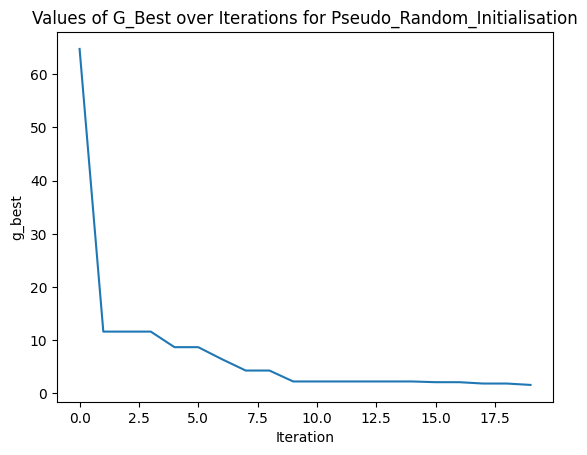

In [37]:
print(G_values_PSO_with_Pseudo_Random_Initialisation)

plt.plot(G_values_PSO_with_Pseudo_Random_Initialisation)
plt.xlabel("Iteration")
plt.ylabel("g_best")
plt.title("Values of G_Best over Iterations for Pseudo_Random_Initialisation")
plt.show()

## CASE 3:  Quasi-Random Sequence

In [38]:
method =' Quasi-Random Sequence'
prompt = f"generate 20 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [39]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

Llama.generate: prefix-match hit


In [40]:
print(response)

{'id': 'cmpl-a9a33952-9d72-411f-bea3-2ed57690ccf1', 'object': 'text_completion', 'created': 1719675280, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': 'SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\nUSER: generate 20 numbers between -10 to 10 by using  Quasi-Random Sequence, only 2 decimal places, \n\nASSISTANT:\n\nCertainly! Here are 20 quasi-random numbers between -10 and 10 with two decimal places:\n\n1. -8.34\n2. 6.57\n3. -3.19\n4. 9.82\n5. -1.28\n6. 4.71\n7. -7.46\n8. 2.03\n9. -5.88\n10. 8.14\n11. -2.62\n12. 3.97\n13. -6.21\n14. 1.35\n15. -4.59\n16. 7.28\n17. -3.02\n18. 5.64\n19. -2.21\n20. 9.37\n\nI hope these numbers meet your needs! Let me know if you have any further questions or requests.', 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 64, 'completion_tokens

In [41]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-8.34, 6.57, -3.19, 9.82, -1.28, 4.71, -7.46, 2.03, -5.88, 8.14, -2.62, 3.97, -6.21, 1.35, -4.59, 7.28, -3.02, 5.64, -2.21, 9.37]


### PSO Parameters

In [42]:
# !pip install pyswarms
# import numpy as np
# import pyswarms as ps
# # from pso.cost_functions import sphere

In [43]:
# initial_position = np.array(numbers)

# def objective_function(x):
#     return np.sum(x**2)

# bounds = (np.array([-10]), np.array([10]))

# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# optimizer = ps.single.GlobalBestPSO(n_particles=len(numbers), dimensions=1, options=options, bounds=bounds, init_pos=initial_position.reshape(-1, 1))

# best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# print('Best position:', best_pos)
# print('Best objective:', best_cost)


In [44]:
# def sphere(x):
#     return sum(x**2)

In [45]:
# CostFunction = sphere  #
# nVar = 10  # Number of Decision Variables
# VarSize = (nVar,)  # Size of Decision Variables Matrix
# VarMin = -10  # Lower Bound of Variables
# VarMax = 10  # Upper Bound of Variables

In [46]:
MaxIt = 20  # Maximum Number of Iterations
nPop = np.size(numbers)  # Population Size (Swarm Size)
if(nPop > 20):
  numbers = numbers[:19]
print(nPop)

20


In [47]:
w = 1  # Inertia Weight
wdamp = 0.99  # Inertia Weight Damping Ratio
c1 = 1.5  # Personal Learning Coefficient
c2 = 2.0  # Global Learning Coefficient

In [48]:
# Velocity Limits                        HOWW. ASK BHAIYA ABOUT THIS
VelMax = 0.1 * (VarMax - VarMin)
VelMin = -VelMax

In [49]:
particles = []

for _ in range(nPop):
    position = np.random.uniform(VarMin, VarMax, VarSize)
    velocity = np.zeros(VarSize)
    cost = CostFunction(position)
    best_position = position.copy()
    best_cost = cost
    particles.append({
        'Position': position,
        'Velocity': velocity,
        'Cost': cost,
        'Best': {
            'Position': best_position,
            'Cost': best_cost
        }
    })
print(np.size(particles))

20


In [50]:
GlobalBest = {'Position': None, 'Cost': np.inf}

for p in particles:
    if p['Cost'] < GlobalBest['Cost']:
        GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

BestCost = np.zeros(MaxIt)

### Running PSO

In [51]:
g_values = []
w_values = []
for it in range(MaxIt):
    for p in particles:
        # Update Velocity
        r1 = np.random.rand(*VarSize)
        r2 = np.random.rand(*VarSize)
        p['Velocity'] = (
            w * p['Velocity']
            + c1 * r1 * (p['Best']['Position'] - p['Position'])
            + c2 * r2 * (GlobalBest['Position'] - p['Position'])
        )

        # Apply Velocity Limits
        p['Velocity'] = np.maximum(p['Velocity'], VelMin)
        p['Velocity'] = np.minimum(p['Velocity'], VelMax)

        # Update Position
        p['Position'] += p['Velocity']

        # Velocity Mirror Effect
        IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
        p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

        # Apply Position Limits
        p['Position'] = np.maximum(p['Position'], VarMin)
        p['Position'] = np.minimum(p['Position'], VarMax)

        # Evaluation
        p['Cost'] = CostFunction(p['Position'])

        # Update Personal Best
        if p['Cost'] < p['Best']['Cost']:
            p['Best']['Position'] = p['Position'].copy()
            p['Best']['Cost'] = p['Cost']

            # Update Global Best
            if p['Best']['Cost'] < GlobalBest['Cost']:
                GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}


    BestCost[it] = GlobalBest['Cost']

    print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")
    g_values.append(GlobalBest['Cost'])

    w *= wdamp
    w_values.append(w)

w_values.append(w)
G_values_PSO_with_Quasi_Random_Sequence_Initialisation = g_values

Iteration 1: Best Cost = 123.74082459038225
Iteration 2: Best Cost = 80.88482593211741
Iteration 3: Best Cost = 28.83323291766405
Iteration 4: Best Cost = 11.467550918304433
Iteration 5: Best Cost = 11.467550918304433
Iteration 6: Best Cost = 11.467550918304433
Iteration 7: Best Cost = 9.587280714412989
Iteration 8: Best Cost = 4.965846161991052
Iteration 9: Best Cost = 4.965846161991052
Iteration 10: Best Cost = 4.096994699453742
Iteration 11: Best Cost = 3.8492809341304604
Iteration 12: Best Cost = 3.8492809341304604
Iteration 13: Best Cost = 2.709448446678348
Iteration 14: Best Cost = 2.709448446678348
Iteration 15: Best Cost = 2.709448446678348
Iteration 16: Best Cost = 2.709448446678348
Iteration 17: Best Cost = 2.709448446678348
Iteration 18: Best Cost = 0.8783831178904116
Iteration 19: Best Cost = 0.8783831178904116
Iteration 20: Best Cost = 0.8783831178904116


[123.74082459038225, 80.88482593211741, 28.83323291766405, 11.467550918304433, 11.467550918304433, 11.467550918304433, 9.587280714412989, 4.965846161991052, 4.965846161991052, 4.096994699453742, 3.8492809341304604, 3.8492809341304604, 2.709448446678348, 2.709448446678348, 2.709448446678348, 2.709448446678348, 2.709448446678348, 0.8783831178904116, 0.8783831178904116, 0.8783831178904116]


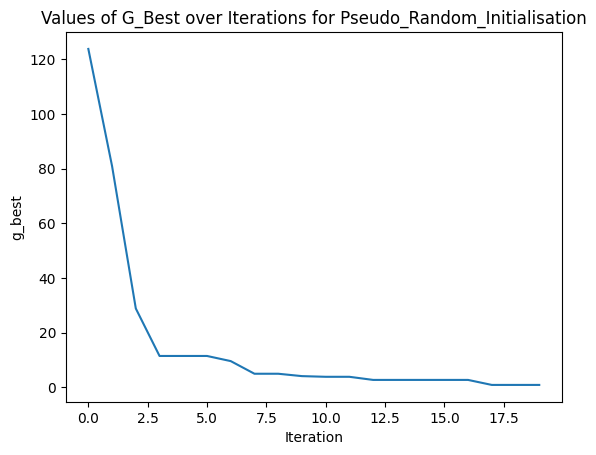

In [52]:
print(G_values_PSO_with_Quasi_Random_Sequence_Initialisation)

plt.plot(G_values_PSO_with_Quasi_Random_Sequence_Initialisation)
plt.xlabel("Iteration")
plt.ylabel("g_best")
plt.title("Values of G_Best over Iterations for Pseudo_Random_Initialisation")
plt.show()

## CASE 4:  Uniform Experimental Design

In [8]:
method ='Uniform Experimental Design'
prompt = f"generate 20 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [9]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

In [ ]:
print(response)

In [ ]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Uniform_Experimental_Design_Initialisation = numbers
print(Uniform_Experimental_Design_Initialisation)

### PSO Parameters

In [22]:
# !pip install pyswarms
# import numpy as np
# import pyswarms as ps
# # from pso.cost_functions import sphere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
# initial_position = np.array(numbers)

# def objective_function(x):
#     return np.sum(x**2)

# bounds = (np.array([-10]), np.array([10]))

# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# optimizer = ps.single.GlobalBestPSO(n_particles=len(numbers), dimensions=1, options=options, bounds=bounds, init_pos=initial_position.reshape(-1, 1))

# best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# print('Best position:', best_pos)
# print('Best objective:', best_cost)


In [35]:
def sphere(x):
    return sum(x**2)

In [36]:
CostFunction = sphere  #
nVar = 10  # Number of Decision Variables
VarSize = (nVar,)  # Size of Decision Variables Matrix
VarMin = -10  # Lower Bound of Variables
VarMax = 10  # Upper Bound of Variables

In [32]:
MaxIt = 20  # Maximum Number of Iterations
nPop = np.size(numbers)  # Population Size (Swarm Size)
if(nPop > 20):
  numbers = numbers[:19]
print(nPop)

19


In [37]:
w = 1  # Inertia Weight
wdamp = 0.99  # Inertia Weight Damping Ratio
c1 = 1.5  # Personal Learning Coefficient
c2 = 2.0  # Global Learning Coefficient

In [38]:
# Velocity Limits                        HOWW. ASK BHAIYA ABOUT THIS
VelMax = 0.1 * (VarMax - VarMin)
VelMin = -VelMax

In [39]:
particles = []

for _ in range(nPop):
    position = np.random.uniform(VarMin, VarMax, VarSize)
    velocity = np.zeros(VarSize)
    cost = CostFunction(position)
    best_position = position.copy()
    best_cost = cost
    particles.append({
        'Position': position,
        'Velocity': velocity,
        'Cost': cost,
        'Best': {
            'Position': best_position,
            'Cost': best_cost
        }
    })
print(np.size(particles))

19


In [40]:
GlobalBest = {'Position': None, 'Cost': np.inf}

for p in particles:
    if p['Cost'] < GlobalBest['Cost']:
        GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

BestCost = np.zeros(MaxIt)

### Running PSO

In [41]:
g_values = []
w_values = []
for it in range(MaxIt):
    for p in particles:
        # Update Velocity
        r1 = np.random.rand(*VarSize)
        r2 = np.random.rand(*VarSize)
        p['Velocity'] = (
            w * p['Velocity']
            + c1 * r1 * (p['Best']['Position'] - p['Position'])
            + c2 * r2 * (GlobalBest['Position'] - p['Position'])
        )

        # Apply Velocity Limits
        p['Velocity'] = np.maximum(p['Velocity'], VelMin)
        p['Velocity'] = np.minimum(p['Velocity'], VelMax)

        # Update Position
        p['Position'] += p['Velocity']

        # Velocity Mirror Effect
        IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
        p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

        # Apply Position Limits
        p['Position'] = np.maximum(p['Position'], VarMin)
        p['Position'] = np.minimum(p['Position'], VarMax)

        # Evaluation
        p['Cost'] = CostFunction(p['Position'])

        # Update Personal Best
        if p['Cost'] < p['Best']['Cost']:
            p['Best']['Position'] = p['Position'].copy()
            p['Best']['Cost'] = p['Cost']

            # Update Global Best
            if p['Best']['Cost'] < GlobalBest['Cost']:
                GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    g_values.append(GlobalBest['Cost'])
    BestCost[it] = GlobalBest['Cost']

    print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")

    w *= wdamp
    w_values.append(w)

w_values.append(w)
G_values_PSO_with_Uniform_Experimental_Design_Initialisation = g_values

Iteration 1: Best Cost = 112.10405318922031
Iteration 2: Best Cost = 59.585873309076206
Iteration 3: Best Cost = 18.354798227448065
Iteration 4: Best Cost = 8.863714798969847
Iteration 5: Best Cost = 6.460801335879746
Iteration 6: Best Cost = 6.460801335879746
Iteration 7: Best Cost = 6.460801335879746
Iteration 8: Best Cost = 6.460801335879746
Iteration 9: Best Cost = 4.147592399233504
Iteration 10: Best Cost = 4.147592399233504
Iteration 11: Best Cost = 3.02273004929555
Iteration 12: Best Cost = 3.02273004929555
Iteration 13: Best Cost = 3.02273004929555
Iteration 14: Best Cost = 3.02273004929555
Iteration 15: Best Cost = 3.02273004929555
Iteration 16: Best Cost = 2.91460438703247
Iteration 17: Best Cost = 2.91460438703247
Iteration 18: Best Cost = 2.91460438703247
Iteration 19: Best Cost = 2.91460438703247
Iteration 20: Best Cost = 2.6347650942968506


[112.10405318922031, 59.585873309076206, 18.354798227448065, 8.863714798969847, 6.460801335879746, 6.460801335879746, 6.460801335879746, 6.460801335879746, 4.147592399233504, 4.147592399233504, 3.02273004929555, 3.02273004929555, 3.02273004929555, 3.02273004929555, 3.02273004929555, 2.91460438703247, 2.91460438703247, 2.91460438703247, 2.91460438703247, 2.6347650942968506]


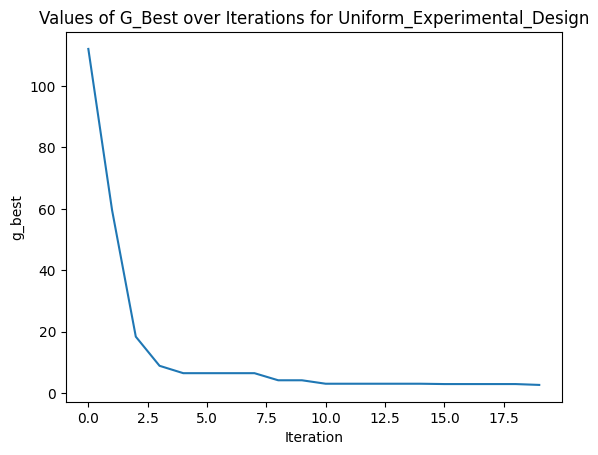

In [42]:
print(G_values_PSO_with_Uniform_Experimental_Design_Initialisation)

plt.plot(G_values_PSO_with_Uniform_Experimental_Design_Initialisation)
plt.xlabel("Iteration")
plt.ylabel("g_best")
plt.title("Values of G_Best over Iterations for Uniform_Experimental_Design")
plt.show()

## CASE 5:  Centroidal Voronoi Tessellation

In [43]:
method ='Centroidal Voronoi Tessellation '
prompt = f"generate EXACTLY 20 numbers between -10 to 10 by using {method}, only 2 decimal places. Just give numeric response "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [44]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

Llama.generate: prefix-match hit


In [45]:
print(response)

{'id': 'cmpl-225fa601-7f62-4799-a75b-0baccc095d10', 'object': 'text_completion', 'created': 1719747344, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': 'SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\nUSER: generate EXACTLY 20 numbers between -10 to 10 by using Centroidal Voronoi Tessellation , only 2 decimal places. Just give numeric response \n\nASSISTANT:\n\nCertainly! Here are exactly 20 numbers between -10 and 10, generated using a centroidal voronoi tessellation with two decimal places:\n\n-8.43\n-7.56\n-6.69\n-5.82\n-4.96\n-4.11\n-3.28\n-2.46\n-1.65\n-0.84\n0.00\n0.17\n0.35\n0.54\n0.73\n0.92\n1.09\n1.27\n1.46\n\nI hope this helps! Let me know if you have any other questions or need further assistance.', 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 74, 'completio

In [46]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]
Centroidal_Voronoi_Tessellation_Initialisation = numbers
print(Centroidal_Voronoi_Tessellation_Initialisation)

[-8.43, -7.56, -6.69, -5.82, -4.96, -4.11, -3.28, -2.46, -1.65, -0.84, 0.0, 0.17, 0.35, 0.54, 0.73, 0.92, 1.09, 1.27, 1.46]


### PSO Parameters

In [47]:
# !pip install pyswarms
# import numpy as np
# import pyswarms as ps
# # from pso.cost_functions import sphere

In [48]:
# initial_position = np.array(numbers)

# def objective_function(x):
#     return np.sum(x**2)

# bounds = (np.array([-10]), np.array([10]))

# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# optimizer = ps.single.GlobalBestPSO(n_particles=len(numbers), dimensions=1, options=options, bounds=bounds, init_pos=initial_position.reshape(-1, 1))

# best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# print('Best position:', best_pos)
# print('Best objective:', best_cost)


In [49]:
# def sphere(x):
#     return sum(x**2)

In [50]:
# CostFunction = sphere  #
# nVar = 10  # Number of Decision Variables
# VarSize = (nVar,)  # Size of Decision Variables Matrix
# VarMin = -10  # Lower Bound of Variables
# VarMax = 10  # Upper Bound of Variables

In [51]:
MaxIt = 20  # Maximum Number of Iterations
nPop = np.size(numbers)  # Population Size (Swarm Size)
if(nPop > 20):
  numbers = numbers[0:20]
print(nPop)

19


In [52]:
w = 1  # Inertia Weight
wdamp = 0.99  # Inertia Weight Damping Ratio
c1 = 1.5  # Personal Learning Coefficient
c2 = 2.0  # Global Learning Coefficient

In [53]:
# Velocity Limits                        HOWW. ASK BHAIYA ABOUT THIS
VelMax = 0.1 * (VarMax - VarMin)
VelMin = -VelMax

In [54]:
particles = []

for _ in range(nPop):
    position = np.random.uniform(VarMin, VarMax, VarSize)
    velocity = np.zeros(VarSize)
    cost = CostFunction(position)
    best_position = position.copy()
    best_cost = cost
    particles.append({
        'Position': position,
        'Velocity': velocity,
        'Cost': cost,
        'Best': {
            'Position': best_position,
            'Cost': best_cost
        }
    })
print(np.size(particles))

19


In [55]:
GlobalBest = {'Position': None, 'Cost': np.inf}

for p in particles:
    if p['Cost'] < GlobalBest['Cost']:
        GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

BestCost = np.zeros(MaxIt)

### Running PSO

In [56]:
g_values = []
w_values = []
for it in range(MaxIt):
    for p in particles:
        # Update Velocity
        r1 = np.random.rand(*VarSize)
        r2 = np.random.rand(*VarSize)
        p['Velocity'] = (
            w * p['Velocity']
            + c1 * r1 * (p['Best']['Position'] - p['Position'])
            + c2 * r2 * (GlobalBest['Position'] - p['Position'])
        )

        # Apply Velocity Limits
        p['Velocity'] = np.maximum(p['Velocity'], VelMin)
        p['Velocity'] = np.minimum(p['Velocity'], VelMax)

        # Update Position
        p['Position'] += p['Velocity']

        # Velocity Mirror Effect
        IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
        p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

        # Apply Position Limits
        p['Position'] = np.maximum(p['Position'], VarMin)
        p['Position'] = np.minimum(p['Position'], VarMax)

        # Evaluation
        p['Cost'] = CostFunction(p['Position'])

        # Update Personal Best
        if p['Cost'] < p['Best']['Cost']:
            p['Best']['Position'] = p['Position'].copy()
            p['Best']['Cost'] = p['Cost']

            # Update Global Best
            if p['Best']['Cost'] < GlobalBest['Cost']:
                GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    g_values.append(GlobalBest['Cost'])
    BestCost[it] = GlobalBest['Cost']

    print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")

    w *= wdamp
    w_values.append(w)

w_values.append(w)
G_values_PSO_with_Centroidal_Voronoi_Tessellation_Initialisation = g_values

Iteration 1: Best Cost = 124.58312001027522
Iteration 2: Best Cost = 64.03263576011642
Iteration 3: Best Cost = 40.89321688658535
Iteration 4: Best Cost = 23.173751674820547
Iteration 5: Best Cost = 15.772434273422588
Iteration 6: Best Cost = 15.772434273422588
Iteration 7: Best Cost = 15.772434273422588
Iteration 8: Best Cost = 9.958425787132136
Iteration 9: Best Cost = 9.958425787132136
Iteration 10: Best Cost = 8.683640892576278
Iteration 11: Best Cost = 8.62708369481974
Iteration 12: Best Cost = 6.61761114548703
Iteration 13: Best Cost = 5.821850887915298
Iteration 14: Best Cost = 4.886369159767403
Iteration 15: Best Cost = 4.886369159767403
Iteration 16: Best Cost = 4.886369159767403
Iteration 17: Best Cost = 4.362666361060199
Iteration 18: Best Cost = 4.362666361060199
Iteration 19: Best Cost = 2.3259957684435504
Iteration 20: Best Cost = 2.3259957684435504


[124.58312001027522, 64.03263576011642, 40.89321688658535, 23.173751674820547, 15.772434273422588, 15.772434273422588, 15.772434273422588, 9.958425787132136, 9.958425787132136, 8.683640892576278, 8.62708369481974, 6.61761114548703, 5.821850887915298, 4.886369159767403, 4.886369159767403, 4.886369159767403, 4.362666361060199, 4.362666361060199, 2.3259957684435504, 2.3259957684435504]


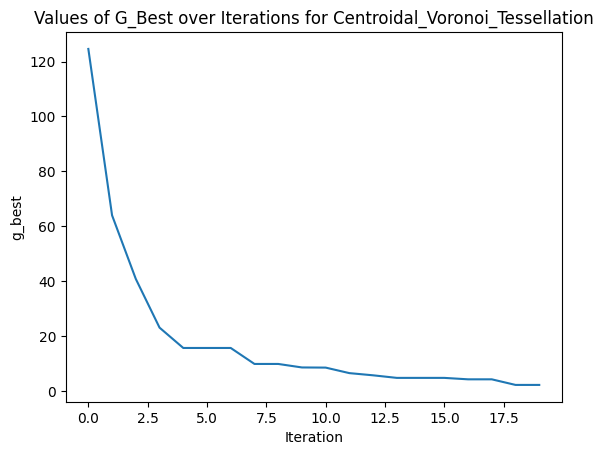

In [57]:
print(G_values_PSO_with_Centroidal_Voronoi_Tessellation_Initialisation)

plt.plot(G_values_PSO_with_Centroidal_Voronoi_Tessellation_Initialisation)
plt.xlabel("Iteration")
plt.ylabel("g_best")
plt.title("Values of G_Best over Iterations for Centroidal_Voronoi_Tessellation")
plt.show()

## Final Comparision

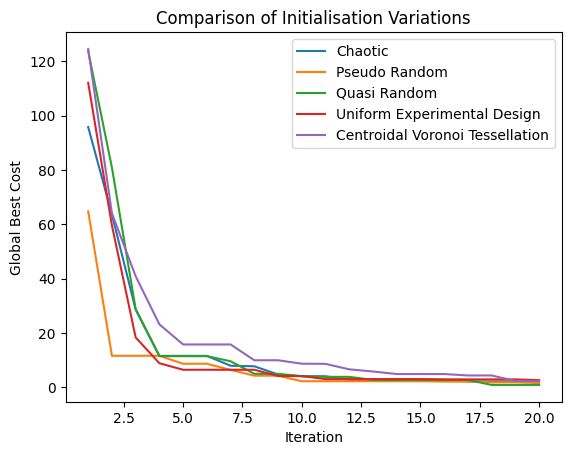

In [58]:
G_values_PSO_with_Chaotic_Initialisation = [95.81318302418991, 63.60053873904889, 28.601818771602066, 11.568002310425129, 11.568002310425129, 11.568002310425129, 7.9359559823818575, 7.742273568449956, 4.722742686548912, 4.063721904435923, 4.063721904435923, 2.7455323239994325, 2.7455323239994325, 2.7455323239994325, 2.7455323239994325, 2.7455323239994325, 2.164817157940039, 2.164817157940039, 2.164817157940039, 2.164817157940039]
G_values_PSO_with_Pseudo_Random_Initialisation = [64.77259238712006, 11.605574003344417, 11.605574003344417, 11.605574003344417, 8.677673532130528, 8.677673532130528, 6.413132080726261, 4.2820947134796565, 4.2820947134796565, 2.2296549571957445, 2.2296549571957445, 2.2296549571957445, 2.2296549571957445, 2.2296549571957445, 2.2296549571957445, 2.09234858885256, 2.09234858885256, 1.8378452613065557, 1.8378452613065557, 1.5782685910547787]
G_values_PSO_with_Quasi_Random_Sequence_Initialisation = [123.74082459038225, 80.88482593211741, 28.83323291766405, 11.467550918304433, 11.467550918304433, 11.467550918304433, 9.587280714412989, 4.965846161991052, 4.965846161991052, 4.096994699453742, 3.8492809341304604, 3.8492809341304604, 2.709448446678348, 2.709448446678348, 2.709448446678348, 2.709448446678348, 2.709448446678348, 0.8783831178904116, 0.8783831178904116, 0.8783831178904116]
G_values_PSO_with_Uniform_Experimental_Design_Initialisation = [112.10405318922031, 59.585873309076206, 18.354798227448065, 8.863714798969847, 6.460801335879746, 6.460801335879746, 6.460801335879746, 6.460801335879746, 4.147592399233504, 4.147592399233504, 3.02273004929555, 3.02273004929555, 3.02273004929555, 3.02273004929555, 3.02273004929555, 2.91460438703247, 2.91460438703247, 2.91460438703247, 2.91460438703247, 2.6347650942968506]
G_values_PSO_with_Centroidal_Voronoi_Tessellation_Initialisation = [124.58312001027522, 64.03263576011642, 40.89321688658535, 23.173751674820547, 15.772434273422588, 15.772434273422588, 15.772434273422588, 9.958425787132136, 9.958425787132136, 8.683640892576278, 8.62708369481974, 6.61761114548703, 5.821850887915298, 4.886369159767403, 4.886369159767403, 4.886369159767403, 4.362666361060199, 4.362666361060199, 2.3259957684435504, 2.3259957684435504]

import matplotlib.pyplot as plt

iterations = range(1, len(G_values_PSO_with_Chaotic_Initialisation) + 1)

# Plot each g_values array
plt.plot(iterations, G_values_PSO_with_Chaotic_Initialisation, label='Chaotic')
plt.plot(iterations, G_values_PSO_with_Pseudo_Random_Initialisation, label='Pseudo Random')
plt.plot(iterations, G_values_PSO_with_Quasi_Random_Sequence_Initialisation, label='Quasi Random')
plt.plot(iterations, G_values_PSO_with_Uniform_Experimental_Design_Initialisation, label='Uniform Experimental Design')
plt.plot(iterations, G_values_PSO_with_Centroidal_Voronoi_Tessellation_Initialisation, label='Centroidal Voronoi Tessellation')

plt.title('Comparison of Initialisation Variations')
plt.xlabel('Iteration')
plt.ylabel('Global Best Cost')

plt.legend()
plt.show()
